## Тема “Обучение без учителя”


### Задание 1
#### Импортируйте библиотеки pandas, numpy и matplotlib.
#### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
#### Создайте датафреймы X и y из этих данных.




In [187]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.datasets import load_boston

boston_house = load_boston()
#data = boston_house['data']
X = pd.DataFrame(data=boston_house['data'], columns=boston_house["feature_names"])
y = pd.DataFrame(data=boston_house['target'], columns=['price'])


#### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
#### Масштабируйте данные с помощью StandardScaler.


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = boston_house["feature_names"])
X_train_scaled

(102, 13) (102, 1) (404, 13) (404, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


#### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

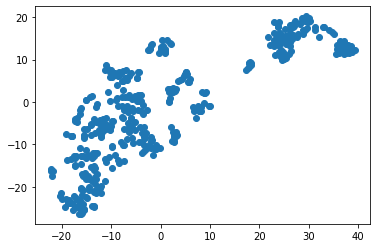

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [189]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42) 

# print(X_train_scaled.describe)

X_train_tsne = model_tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()
X_train_tsne

### Задание 2
#### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
#### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
#### Вычислите средние значения price и CRIM в разных кластерах.


[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]
средняя цена в кластере 0 27.788372093023252
средняя преступность в кластере 0 0.07356558139534886
средняя цена в кластере 1 16.165354330708666
средняя преступность в кластере 1 10

<ipython-input-190-d4cb99bd3f8c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Claster'] = model_km


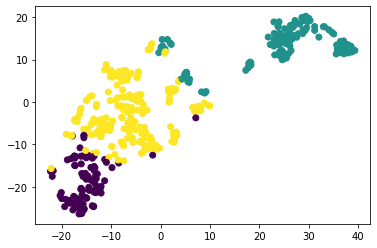

In [190]:
from sklearn.cluster import KMeans

model_km = KMeans(n_clusters=3, max_iter=100, random_state=42).fit_predict(X_train_scaled)
#train_labels = model_km.cluster_centers_
print(model_km)

#train_labels = model_km
#centers = scaler.inverse_transform(model_km.cluster_centers_)
### Вероятно центры найдены неправильно, можете проверить? 
### Почему они дают такой результат на графике, почему вообще выпадает 13 значений вместо 3?!
#print(centers)

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=model_km)
#plt.scatter(centers[:, 8], centers[:, 2],  color='red')

X_train['Claster'] = model_km

data = X_train.join(y_train)
print('средняя цена в кластере 0', data[data['Claster']==0]['price'].mean())
print('средняя преступность в кластере 0', data[data['Claster']==0]['CRIM'].mean())
print('средняя цена в кластере 1', data[data['Claster']==1]['price'].mean())
print('средняя преступность в кластере 1', data[data['Claster']==1]['CRIM'].mean())
print('средняя цена в кластере 2', data[data['Claster']==2]['price'].mean())
print('средняя преступность в кластере 2', data[data['Claster']==2]['CRIM'].mean())

### *Задание 3
#### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
#### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [191]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = boston_house["feature_names"])
model_km_test = KMeans(n_clusters=3, max_iter=100, random_state=42).fit_predict(X_test_scaled)
model_km_test


X_test['Claster'] = model_km_test

data_test = X_test.join(y_test)
print('средняя цена в кластере 0', data_test[data_test['Claster']==0]['price'].mean())
print('средняя преступность в кластере 0', data_test[data_test['Claster']==0]['CRIM'].mean())
print('средняя цена в кластере 1', data_test[data_test['Claster']==1]['price'].mean())
print('средняя преступность в кластере 1', data_test[data_test['Claster']==1]['CRIM'].mean())
print('средняя цена в кластере 2', data_test[data_test['Claster']==2]['price'].mean())
print('средняя преступность в кластере 2', data_test[data_test['Claster']==2]['CRIM'].mean())


средняя цена в кластере 0 34.55384615384615
средняя преступность в кластере 0 0.08308461538461537
средняя цена в кластере 1 16.710526315789473
средняя преступность в кластере 1 9.419181842105264
средняя цена в кластере 2 21.71764705882353
средняя преступность в кластере 2 0.22250117647058823


<ipython-input-191-0b86863dcec5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Claster'] = model_km_test
